In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [197]:
data = np.load('/Users/mchifala/Desktop/CSCI_5622/Project/storm_forecast-master/storm_forecast_zero_D.npy')
data = data.item()
data['lasso_regressor']

{1e-05: 16.83202289378715,
 0.0001: 16.83202352839266,
 0.001: 16.832032266456707,
 0.01: 16.832328786388697,
 0.1: 16.854341173885572,
 1: 17.289730368363184}

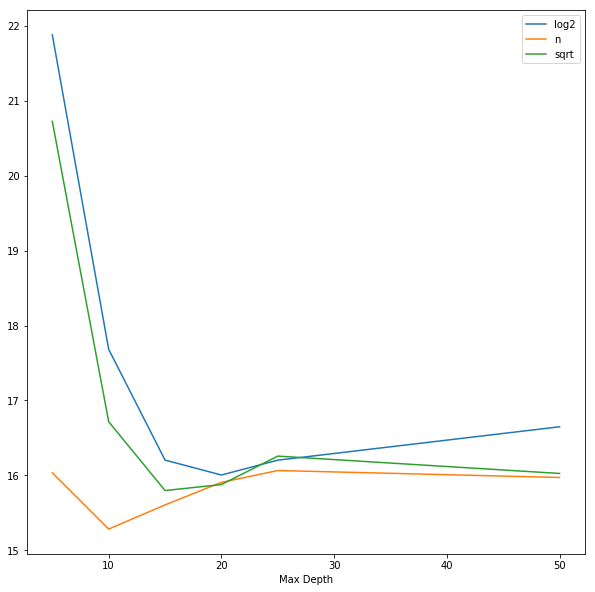

In [214]:
tree_data = data['tree_regressor']

tree = pd.DataFrame.from_dict(tree_data, orient = 'index')
tree = tree.reset_index()
tree = pd.concat([tree, pd.DataFrame(tree['index'].tolist())], axis = 1).drop('index', axis = 1)
tree.columns = ['RMSE', 'Max Depth', 'Max Features']
tree['Max Features'].replace({None: 'n'}, inplace = True)

plt.figure(figsize = (10,10))
for key, grp in tree.groupby(['Max Features']):
    fig = grp.plot(ax=plt.gca(), kind='line', x='Max Depth', y='RMSE', label=key)
    
plt.legend(loc='best')
plt.show()

Text(0.5,1,'Ridge Regression')

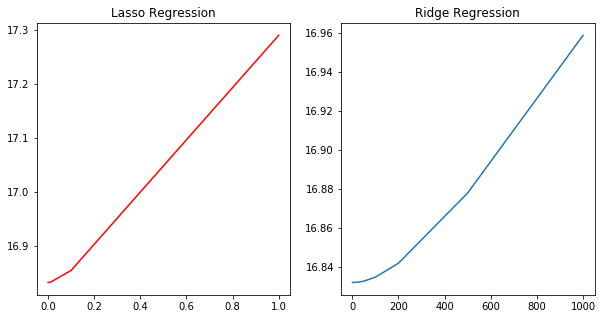

In [249]:
lasso_data = data['lasso_regressor']
ridge_data = data['ridge_regressor']
lasso = pd.DataFrame.from_dict(lasso_data, orient = 'index')
lasso = lasso.reset_index()
lasso.columns = ['Alpha', 'RMSE']

ridge = pd.DataFrame.from_dict(ridge_data, orient = 'index')
ridge = ridge.reset_index()
ridge.columns = ['Alpha', 'RMSE']

fig, axes = plt.subplots(1, 2, figsize = (10,5))

axes[0].plot(lasso['Alpha'], lasso['RMSE'], c = 'red')
axes[0].set_title("Lasso Regression")

axes[1].plot(ridge['Alpha'], ridge['RMSE'])
axes[1].set_title("Ridge Regression")



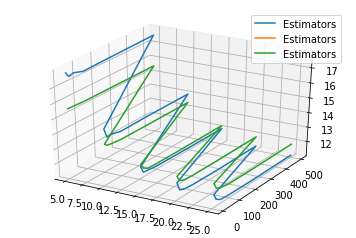

In [255]:
from mpl_toolkits.mplot3d import Axes3D
forest_data = data['forest_regressor']

forest = pd.DataFrame.from_dict(forest_data, orient = 'index')
forest = forest.reset_index()
forest = pd.concat([forest, pd.DataFrame(forest['index'].tolist())], axis = 1).drop('index', axis = 1)
forest.columns = ['RMSE', 'Max Depth', 'Max Features', 'Estimators']
forest['Max Features'].replace({None: 'n'}, inplace = True)

sqrt = forest.loc[forest['Max Features'] == 'sqrt']
log = forest.loc[forest['Max Features'] == 'log']
n = forest.loc[forest['Max Features'] == 'n']

fig = plt.figure()
fig.gca(projection='3d')
for i in [sqrt, log, n]:
    plt.plot(i['Max Depth'], i['Estimators'], i['RMSE'])
#for key, grp in forest.groupby(['Max Features']):
    #fig = grp.plot3d(ax=plt.gca(), x='Max Depth', y= 'Estimators', z ='RMSE',  label=key)
    
plt.legend(loc='best')
plt.show()
